In [1]:
# !pip install google-play-scraper
# !pip install tqdm

In [2]:
from google_play_scraper import app, reviews, Sort
import time
import string
import random
import os
import pandas as pd

# Fetching Reviews from Play Store

In [3]:
def fetch_reviews(app_name, app_id):
    
    try:
        os.mkdir(app_name)
    except FileExistsError:
        pass
    
    # Empty list for storing reviews
    app_reviews = []
    
    # Number of reviews to scrape per batch
    count = 10
    
    # To keep track of how many batches have been completed
    batch_num = 0
    
    
    # Retrieve reviews (and continuation_token) with reviews function
    rvws, token = reviews(
        app_id,           # found in app's url
        lang='en',        # defaults to 'en'
        country='us',     # defaults to 'us'
        sort=Sort.NEWEST, # start with most recent
        count=count       # batch size
    )
     
    
    # Add the list of review dicts to overall list
    app_reviews.extend(rvws)
    
    # Increase batch count by one
    batch_num +=1 
    
    # Wait 1 to 5 seconds to start next batch
    time.sleep(random.randint(1,5))
    
    
    
    # Append review IDs to list prior to starting next batch
    pre_review_ids = []
    for rvw in app_reviews:
        pre_review_ids.append(rvw['reviewId'])
    
    
    # Loop through at most max number of batches
    for batch in range(5):
        rvws, token = reviews( # store continuation_token
            app_id,
            lang='en',
            country='us',
            sort=Sort.NEWEST,
            count=count,
            # using token obtained from previous batch
            continuation_token=token
        )
        
        # Append unique review IDs from current batch to new list
        new_review_ids = []
        for r in rvws:
            new_review_ids.append(r['reviewId'])
            
     
        # Add the list of review dicts to main app_reviews list
        app_reviews.extend(rvws)
        
        # Increase batch count by one
        batch_num +=1
        
        # Break loop and stop scraping for current app if most recent batch
          # did not add any unique reviews
        all_review_ids = pre_review_ids + new_review_ids
        if len(set(pre_review_ids)) == len(set(all_review_ids)):
            print(f'No reviews left to scrape. Completed {batch_num} batches.\n')
            break
        
        # all_review_ids becomes pre_review_ids to check against 
          # for next batch
        pre_review_ids = all_review_ids
        
        
        # At every 100th batch
        # if batch_num%100==0:
        if True:
            
            # print update on number of batches
            print(f'Batch {batch_num} completed.')
            
            df = pd.DataFrame(app_reviews)
            df = df[['content', 'thumbsUpCount', 'score']]
            
            ran = app_name + ''.join(random.choices(string.ascii_uppercase + string.digits, k = 10))    
            
            df.to_csv(f"./{app_name}/{ran}.csv")
            
            # empty our list for next round of 100 batches
            app_reviews = []
        
        # Wait 1 to 5 seconds to start next batch
        time.sleep(random.randint(1,5))
      
# Reviews for tinder
fetch_reviews('tinder', 'com.tinder')
    

Batch 2 completed.
Batch 3 completed.
Batch 4 completed.
Batch 5 completed.
Batch 6 completed.


# Analysis of Tinder

### Getting all the csv files with the reviews for tinder


In [4]:
csv_files = list(filter(lambda x: x.endswith('.csv'),os.listdir('tinder')))
csv_files = list(map(lambda x: os.path.join('tinder', x), csv_files))
csv_files

['tinder/tinder9UG0K0Y0V1.csv',
 'tinder/tinderC223HAXNRL.csv',
 'tinder/tinderV26M3WYVOI.csv',
 'tinder/tinderPZ925UY24K.csv',
 'tinder/tinderJHWJWA7TD1.csv',
 'tinder/tinderV99NUQCO4V.csv',
 'tinder/tinder06TLMQ8IIV.csv',
 'tinder/tinderICEXIUXR2R.csv',
 'tinder/tinderL4KTYDPHV6.csv',
 'tinder/tinderHOHXUXFWKJ.csv',
 'tinder/tinderWFDQEF8WBO.csv',
 'tinder/tinderZ10DFES4TE.csv',
 'tinder/tinderGB414897KI.csv',
 'tinder/tinderVR8V907VKD.csv',
 'tinder/tinderMI6PTTEFWJ.csv',
 'tinder/tinderU266I3RCFH.csv',
 'tinder/tinderMM1E28EVZL.csv',
 'tinder/tinderA9M0ZCY6LL.csv',
 'tinder/tinder8I3XQSJVHI.csv',
 'tinder/tinder2KK6N2SXKL.csv',
 'tinder/tinderPE9QSMZJ8I.csv',
 'tinder/tinderT8L2X1GIZ6.csv',
 'tinder/tinderGEBCP0JJ3P.csv',
 'tinder/tinderMWND0PR7GF.csv']

## Combining all the review dataset

In [22]:
df = pd.DataFrame()

for file in csv_files:
    df = df.append(pd.read_csv(file))
df.head()


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOG5JyKoCRdi0foWmKJS8o_J6s2A0L3ZSBnhzco...,Dharmendra meena,https://play-lh.googleusercontent.com/a-/AOh14...,Good,3,0,10.6.0,2019-03-19 13:02:47,NaN,NaN
1,1,gp:AOqpTOGsXNvAQVoGZUz4FjBJrR-gm3DzTGSLVL8BpUY...,Travis Martin,https://play-lh.googleusercontent.com/a-/AOh14...,awesome,5,0,10.10.0,2019-03-19 12:54:48,NaN,NaN
2,2,gp:AOqpTOG0OVoP3F_qzkwfWEX-0i61Q1AVICahAEpwd6j...,Wayne Lethbridge,https://play-lh.googleusercontent.com/a/AATXAJ...,Had matches and thought they deleted but that ...,1,1,10.10.0,2019-03-19 12:53:24,NaN,NaN
3,3,gp:AOqpTOEEN6QHPQblPCNG6Yrdlwo8ixd6McI9ctMLhrn...,Persephone Stends,https://play-lh.googleusercontent.com/a/AATXAJ...,it does its job can't really complain just got...,4,0,10.10.0,2019-03-19 12:46:28,NaN,NaN
4,4,gp:AOqpTOFyjR-KLIvE7wrR5wPqeHBk3Q2ZvCZ4IdJhcON...,lorcan mullane,https://play-lh.googleusercontent.com/a/AATXAJ...,good,5,0,10.9.0,2019-03-19 12:43:19,NaN,NaN


## Droping extra columns

* **content**: contains the actual review
* **score**: number of stars provided by user
* **thumbsupCount**: thumbsup for the review
* **at**: time of posting
  
Reset the Index also


In [24]:
df = df[['content', 'score', 'thumbsUpCount', 'at']]
df.reset_index(inplace=True)
df

,content,score,thumbsUpCount,at
0,Good,3,0,2019-03-19 13:02:47
1,awesome,5,0,2019-03-19 12:54:48
2,Had matches and thought they deleted but that ...,1,1,2019-03-19 12:53:24
3,it does its job can't really complain just got...,4,0,2019-03-19 12:46:28
4,good,5,0,2019-03-19 12:43:19
...,...,...,...,...
19995,Just after 2-4 swipes the app is not working. ...,2,0,2017-11-06 13:28:06
19996,"New friends, new relation and new experience",5,0,2017-11-06 13:25:37
19997,how do you lower the difficulty?,3,0,2017-11-06 13:06:22
19998,Very confuse i see free free everywhere. Someo...,1,0,2017-11-06 12:59:24


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

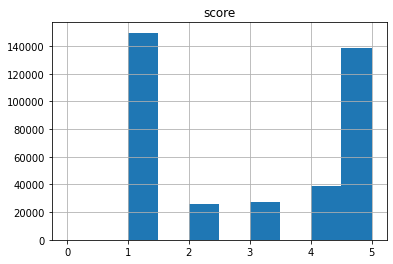

In [27]:
df.hist('score')

In [66]:
df[df['thumbsUpCount']>1000]

,index,content,score,thumbsUpCount,at
7948,7948,"Fake and useless app, google and find what tin...",1,2311,2019-02-19 17:55:16
9785,9785,It crashes every time i tried to opened it. Pu...,1,1018,2019-02-13 11:45:55
23240,3230,"When you create a profile, the app boosts your...",1,1134,2021-12-09 19:31:54
26690,6680,You know there's something wrong with your app...,1,1969,2021-11-19 22:05:17
33034,13024,Nearly unusable now. No matter how many times ...,1,2047,2021-10-10 14:52:50
36836,16826,Endless fake profiles. How can they be so hard...,1,1103,2021-09-16 20:20:05
37919,17909,"Sadly, giving 0 stars is not possible, but it'...",1,1199,2021-09-10 12:55:22
46841,6801,I really enjoy this dating app overall. The on...,5,1318,2019-10-16 04:13:23
48413,8373,Wants to charges an exuberant amount of money ...,2,1120,2019-10-08 11:00:27
54763,14723,Can't remove my credit card info from their ap...,1,1006,2019-09-14 08:24:08


# NLP

## Tagging the english reviews
We will be focusing on just english reviews

In [92]:
# !pip install langdetect


from langdetect import detect_langs

((detect_langs(df.iloc[4543].content))[0]).lang


'en'

In [96]:
def tagging(data):
    try:
        return detect_langs(data)[0].lang
    except:
        return 'undefined'

df['lang'] = df['content'].apply(tagging)

In [ ]:
df

In [67]:
df.iloc[370472].content

'Too many girls delete it after a week and tinder keeps showing them on the app. It used to show when people haven\'t been on in a week but tinder got rid of that feature. It also used to have "moments" which is kind of like a Snapchat story picture except girls could like it and that would let you know they\'re still interested and active but of course tinder got rid of another good feature. And after you pay they keep showing ads.'

In [19]:

for file in csv_files:
    a = (pd.read_csv(file))
    # print(a)
    s = s.append(a)

In [21]:
s.size

4180660

In [7]:
s.append(pd.read_csv(csv_files[0]))

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOG5JyKoCRdi0foWmKJS8o_J6s2A0L3ZSBnhzco...,Dharmendra meena,https://play-lh.googleusercontent.com/a-/AOh14...,Good,3,0,10.6.0,2019-03-19 13:02:47,NaN,NaN
1,1,gp:AOqpTOGsXNvAQVoGZUz4FjBJrR-gm3DzTGSLVL8BpUY...,Travis Martin,https://play-lh.googleusercontent.com/a-/AOh14...,awesome,5,0,10.10.0,2019-03-19 12:54:48,NaN,NaN
2,2,gp:AOqpTOG0OVoP3F_qzkwfWEX-0i61Q1AVICahAEpwd6j...,Wayne Lethbridge,https://play-lh.googleusercontent.com/a/AATXAJ...,Had matches and thought they deleted but that ...,1,1,10.10.0,2019-03-19 12:53:24,NaN,NaN
3,3,gp:AOqpTOEEN6QHPQblPCNG6Yrdlwo8ixd6McI9ctMLhrn...,Persephone Stends,https://play-lh.googleusercontent.com/a/AATXAJ...,it does its job can't really complain just got...,4,0,10.10.0,2019-03-19 12:46:28,NaN,NaN
4,4,gp:AOqpTOFyjR-KLIvE7wrR5wPqeHBk3Q2ZvCZ4IdJhcON...,lorcan mullane,https://play-lh.googleusercontent.com/a/AATXAJ...,good,5,0,10.9.0,2019-03-19 12:43:19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,gp:AOqpTOFIm_EBH6gocY2zzhMsTBO7kaQ10rfIP2hInbC...,Grayson Eckroth,https://play-lh.googleusercontent.com/a/AATXAJ...,Just cycles the same 20-30 people whether I sa...,1,0,NaN,2019-01-03 21:32:35,NaN,NaN
19996,19996,gp:AOqpTOHZLeg_9nI7lUne48tJcmNX1FEkQYJhNao1oIY...,Vishal Thapa,https://play-lh.googleusercontent.com/a-/AOh14...,i got superlike several times but it asks mone...,1,0,10.4.2,2019-01-03 21:26:58,NaN,NaN
19997,19997,gp:AOqpTOFaS6q5IZ-5rL8dI_Y1pDJHf73BpCCX9o2MFf-...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good n excellent,5,0,10.4.1,2019-01-03 21:22:54,NaN,NaN
19998,19998,gp:AOqpTOE_Og-5ZWaIzs4hiidkHlh9hsI0UhUlzOc4vmk...,Joel Polanco,https://play-lh.googleusercontent.com/a-/AOh14...,ive gotten more matches than any other app. It...,4,6,10.4.2,2019-01-03 21:21:22,NaN,NaN


In [6]:
dff0 = pd.read_csv(csv_files[0])[['userName', 'thumbsUpCount', 'content', 'score']]
dff1 = pd.read_csv(csv_files[1])[['userName', 'thumbsUpCount', 'content', 'score']]

KeyError: "['userName'] not in index"

,userName,thumbsUpCount,content,score
0,Uncle SlyJohnny Coolwater,4,***PLEASE READ*** THEY PAY 3RD PARTIES TO CREA...,3
1,Alwin Ozloren cozad,1,"not worth the data on ur phone.Well, I had bee...",2
2,Seth TeeplesZac lol,2,They are too money hungry. It's annoying buy t...,2
3,Joseph MckinneyTyrone Monk-Gover,0,Barley any action on here or Facebook to think...,4
4,Reshwant ChooJaxon Goldthrite,0,pay to win lolBanned and dont know why.,2
...,...,...,...,...
19995,Ainino JustineAditi Debnath,0,Nice place to beI have no clue why this app cr...,6
19996,Ruslan GolyshevskyAwesome Suika,0,"Great app,lots of potentialPretty disappointin...",6
19997,Christopher MattheisPal Kollar,2,I'm banned??Just wants your money. Another bad...,2
19998,Crystal DelgadoUmed Singh,1,The app doest always work.Ok,5


In [ ]:
dff1 + dff0

,userName,thumbsUpCount,content,score
0,Johnny CoolwaterUncle Sly,4,Rarely ever make connections***PLEASE READ*** ...,3
1,loren cozadAlwin Oz,1,"Well, I had been using tinder for years and I ...",2
2,Zac lolSeth Teeples,2,These people are continuing to force you to vi...,2
3,Tyrone Monk-GoverJoseph Mckinney,0,App barley works and that new fast chat won't ...,4
4,Jaxon GoldthriteReshwant Choo,0,Banned and dont know why.pay to win lol,2
...,...,...,...,...
19995,Aditi DebnathAinino Justine,0,I have no clue why this app crashes down so fr...,6
19996,Awesome SuikaRuslan Golyshevsky,0,Pretty disappointing I have premium for a long...,6
19997,Pal KollarChristopher Mattheis,2,Just wants your money. Another bad thing that ...,2
19998,Umed SinghCrystal Delgado,1,OkThe app doest always work.,5


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOHWLli172pn97znLm_mqRdngKaaHrHgfIj-svH...,Uncle Sly,https://play-lh.googleusercontent.com/a-/AOh14...,***PLEASE READ*** THEY PAY 3RD PARTIES TO CREA...,1,3,12.21.0,2021-12-29 00:04:15,NaN,NaN
1,1,gp:AOqpTOH9_3zAhct9PvW9fyUpSJAmnAY-3dAciKmGdVD...,Alwin Oz,https://play-lh.googleusercontent.com/a-/AOh14...,not worth the data on ur phone.,1,0,12.22.1,2021-12-29 00:02:28,NaN,NaN
2,2,gp:AOqpTOGbfwCwNGNpRFY9Xzuxx0H1aZStFxlGh1Tb7n7...,Seth Teeples,https://play-lh.googleusercontent.com/a/AATXAJ...,They are too money hungry. It's annoying buy t...,1,0,12.22.1,2021-12-28 23:57:30,NaN,NaN
3,3,gp:AOqpTOF28zhLe5weUyRhjGXALnX2igWq2xSmL6LaFKF...,Joseph Mckinney,https://play-lh.googleusercontent.com/a-/AOh14...,Barley any action on here or Facebook to think...,3,0,12.22.1,2021-12-28 23:56:03,NaN,NaN
4,4,gp:AOqpTOHrIpbQflnqaBqYvoVFUmqTL1fozS_QwdmlVBm...,Reshwant Choo,https://play-lh.googleusercontent.com/a-/AOh14...,pay to win lol,1,0,12.22.1,2021-12-28 23:52:49,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,gp:AOqpTOHBE-Ik6sv1VdkFTXDHKpzPIy014R1TmfkaQVq...,Ainino Justine,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice place to be,5,0,12.15.0,2021-08-28 07:50:48,NaN,NaN
19996,19996,gp:AOqpTOFNty0abJFuCA8IZLcou-meXXTc6R4IHelpVY4...,Ruslan Golyshevsky,https://play-lh.googleusercontent.com/a-/AOh14...,"Great app,lots of potential",5,0,NaN,2021-08-28 07:48:32,NaN,NaN
19997,19997,gp:AOqpTOFXDfPVzkkoptOEiPuG0bFGxpf46Oh9V9y8ktQ...,Christopher Mattheis,https://play-lh.googleusercontent.com/a-/AOh14...,I'm banned??,1,1,12.15.0,2021-08-28 07:47:57,NaN,NaN
19998,19998,gp:AOqpTOE9XcYH1N7v3sVG5wE1e1lueZ0SpCuQy50Vq84...,Crystal Delgado,https://play-lh.googleusercontent.com/a-/AOh14...,The app doest always work.,1,1,12.15.0,2021-08-28 07:40:09,NaN,NaN
